In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
import matplotlib as mpl
default_font_size = mpl.rcParams['font.size']
mpl.rcParams.update({'font.size': default_font_size*1})

## Definir fit de las curvas

In [2]:
def gauss(x,amp,mu,sigma):
    return amp*np.exp(-(x-mu)**2/(2*sigma**2))

In [3]:
data= pd.read_csv(r'Volcan de Chiles/53a777aeacb8de3cb92eb946c1fdce12/53a777aeacb8de3cb92eb946c1fdce12/4483988_0.82_-77.93_2022.csv',header=2,sep=',')
data

,Year,Month,Day,Hour,Minute,DHI,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,DNI,GHI,Solar Zenith Angle,Surface Albedo
0,2022,1,1,0,0,0,0.9,0,0,0,0,0,157.52,0.11
1,2022,1,1,1,0,0,0.8,0,0,0,0,0,155.29,0.11
2,2022,1,1,2,0,0,0.6,0,0,0,0,0,146.24,0.11
3,2022,1,1,3,0,0,0.4,0,0,0,0,0,134.28,0.11
4,2022,1,1,4,0,0,0.3,0,0,0,0,0,121.18,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2022,12,31,19,0,0,2.2,0,0,0,0,0,100.67,0.11
8756,2022,12,31,20,0,0,1.9,0,0,0,0,0,114.36,0.11
8757,2022,12,31,21,0,0,1.6,0,0,0,0,0,127.75,0.11
8758,2022,12,31,22,0,0,1.3,0,0,0,0,0,140.41,0.11


## Extracción de los datos deseados

1.   DHI : Irradiancia solar difusa, mide la cantidad de radiación que llega al suelo después de haber sido dispersada por la atmósfera
2. DNI : Irradiancia directa del sol que llega perpendicularmente a una superficie que siempre está orientada hacia el sol.  
3.   GHI : Irradiancia global total que llega a una
superficie. Se calcula teóricamente como:  
$$GHI=DHI+DNI\cdot\cos(\theta)$$
4. Temperatura
5. Ángulo Zenith del sol

In [1131]:
#Hour=[]
#for i in range(len(data['Hour']):
#               Hour=Hour.append(data['Hour'][i]+data['Day']*24+data['Hour'][i

In [1132]:
Temperatura=data['Temperature']
DHI=data['DHI']
DNI=data['DNI']
GHI=data['GHI']
theta=data['Solar Zenith Angle']
Hour=data['Hour']
#CS_DHI=data['Clearsky DHI']
#CS_GHI=data['Clearsky GHI']
#CS_DNI=data['Clearsky DNI']

## Obtención de todas las curvas de GHI de todos los días 

In [1133]:
n = 24  # Tamaño del bloque (24 horas por día)
num_days = len(data['Hour']) // n  # Número de días en los datos

# Inicializar una lista para almacenar todas las curvas
all_curves = []

# Bucle para recolectar todas las curvas
for i in range(0, len(data['Hour']), n):
    # Extraer los datos correspondientes al bloque actual
    GHI_block = GHI[i:i+n]
    all_curves.append(GHI_block)

# Convertir todas las curvas en una matriz para facilitar el procesamiento
all_curves = np.array(all_curves)

# Encontrar la curva más externa (la de valores máximos en cada punto)
curva_externa = np.max(all_curves, axis=0)
curva_promedio= np.mean(all_curves, axis=0)
curva_minima = np.min(all_curves, axis=0)

## Hallando integral de la curva


## Hallando máximos de la curva máxima, promedio y mínima de GHI 

In [1134]:
indice_maximo_1 = np.argmax(curva_externa)
indice_maximo_2 = np.argmax(curva_promedio)
indice_maximo_3 = np.argmax(curva_minima)
print(indice_maximo_1)
print(indice_maximo_2)
print(indice_maximo_3)

12
11
12


In [1135]:
max_GHI_1 = np.max(GHI)
max_GHI_2 = np.max(curva_promedio)
max_GHI_3 = np.max(curva_minima)
x_1=indice_maximo_1*np.ones_like(GHI)
x_2=indice_maximo_2*np.ones_like(GHI)
x_3=indice_maximo_3*np.ones_like(GHI)
y_1=max_GHI_1  *np.ones_like(GHI)
y_2=np.max(curva_promedio)*np.ones_like(GHI)
y_3=max_GHI_1 *np.ones_like(GHI)



## Comparación con otros cuerpos 

In [1136]:
I_Marte=np.array([3,73,185,302,399,471,508,471,399,302,185,73,3])*24.65/24
Marte_Horas=np.array([7,8,9,10,11,12,13,14,15,16,17,18,19])*24.65/24
I_Marte_max=np.max(I_Marte)
x_Marte=Marte_Horas[np.argmax(I_Marte)]*np.ones_like(I_Marte)
x_Marte

array([13.35208333, 13.35208333, 13.35208333, 13.35208333, 13.35208333,
       13.35208333, 13.35208333, 13.35208333, 13.35208333, 13.35208333,
       13.35208333, 13.35208333, 13.35208333])

## GRÁFICA DE GHI 

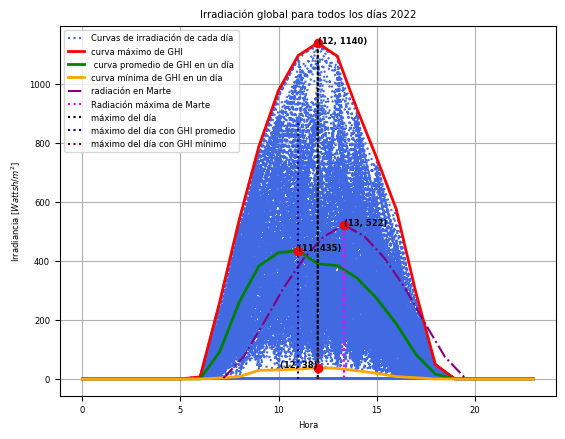

In [1137]:

# Crear la gráfica
plt.figure()

# Graficar la curva más externa en un color diferente
plt.plot(data['Hour'], GHI, color='royalblue',linestyle='dotted', label='Curvas de irradiación de cada día')
plt.plot(data['Hour'][:n], curva_externa, color='red', linewidth=2, linestyle='-', label='curva máximo de GHI ')
plt.plot(data['Hour'][:n], curva_promedio, color='green', linewidth=2, linestyle='-', label=' curva promedio de GHI en un día')
plt.plot(data['Hour'][:n], curva_minima, color='orange', linewidth=2, linestyle='-', label='curva mínima de GHI en un día')
plt.plot(Marte_Horas,I_Marte,color='purple',linestyle='-.',label='radiación en Marte')
plt.plot(x_Marte,I_Marte,color='magenta',linestyle='dotted',label='Radiación máxima de Marte')
plt.plot(x_1, GHI, color='black', linestyle='dotted', label='máximo del día')
plt.plot(x_2[0:11], GHI[0:11], color='darkblue', linestyle='dotted', label='máximo del día con GHI promedio')
plt.plot(x_3[0:8], GHI[0:8], color='maroon', linestyle='dotted', label='máximo del día con GHI mínimo')
plt.plot(indice_maximo_1, max_GHI_1, 'ro')
plt.text(indice_maximo_1, max_GHI_1, f'({indice_maximo_1}, {max_GHI_1})', ha='left',fontweight='bold')
plt.plot(indice_maximo_2, max_GHI_2, 'ro')
plt.text(indice_maximo_2, max_GHI_2, f'({indice_maximo_2}, {max_GHI_2:.0f})', ha='left',fontweight='bold')
plt.plot(indice_maximo_3, max_GHI_3, 'ro')
plt.text(indice_maximo_3, max_GHI_3, f'({indice_maximo_3}, {max_GHI_3})', ha='right',fontweight='bold')
plt.text(x_Marte[0], I_Marte_max, f'({x_Marte[0]:.0f}, {I_Marte_max:.0f})', ha='left',fontweight='bold')
plt.plot(x_Marte[0], I_Marte_max, 'ro')
# Personalizar la gráfica
plt.title('Irradiación global para todos los días 2022')
plt.xlabel('Hora')
plt.ylabel(r'Irradiancia $[Wattsh/m^2]$')
plt.legend(loc='upper left')
plt.grid(True)

# Guardar y mostrar la gráfica
plt.savefig(r'D:\Documents\Documentos_Valentina\TITAN\Artículos\Artìculo CEC2024\Volcan de Chiles\Comparación con Marte_Volcan de Chiles_2022')
plt.show()

In [1138]:
err=np.abs(522-378)*100/522
err

27.586206896551722

In [1139]:
err_2=np.abs(522-435)*100/522
err_2

16.666666666666668